<a href="https://colab.research.google.com/github/duynguyen123vn/duynguyen123vn/blob/main/Copy_of_Assigment_Recomment_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
quandang_vietnamese_foods_path = kagglehub.dataset_download('quandang/vietnamese-foods')

print('Data source import complete.')


Data source import complete.


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

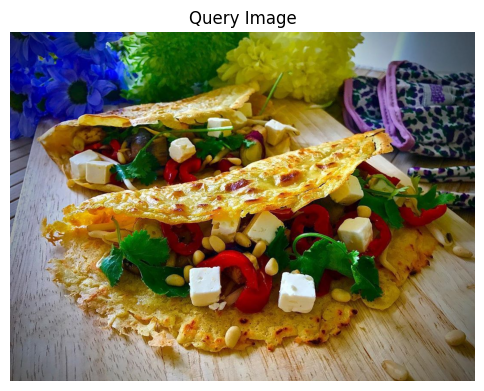

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Similar Images Found:


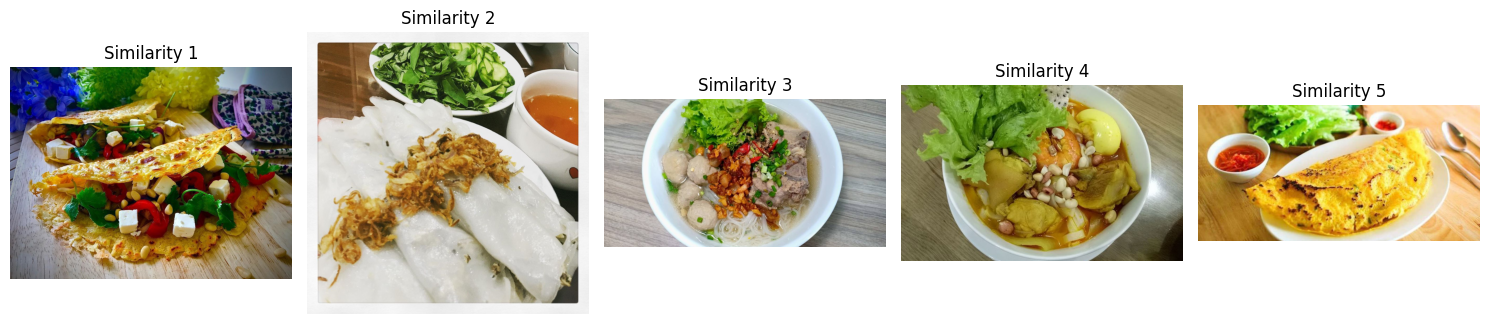

In [9]:
from IPython import get_ipython
from IPython.display import display

# %%
from google.colab import drive
# TODO: Mount Google Drive
drive.mount('/content/drive')

# %%
# TODO: Install necessary libraries (keras, tensorflow, opencv-python-headless, scikit-learn)
!pip install keras
!pip install tensorflow
!pip install opencv-python-headless
!pip install scikit-learn

# %%
# Step 2: Import necessary libraries
# TODO: Import the following libraries: numpy, os, cv2, cosine_similarity from sklearn.metrics.pairwise, EfficientNetB0 from keras.applications, preprocess_input from keras.applications.efficientnet, image from keras.preprocessing, drive from google.colab, matplotlib.pyplot as plt.
import numpy as np
import os
import cv2
from sklearn.metrics.pairwise import cosine_similarity
from keras.preprocessing import image
from google.colab import drive
import matplotlib.pyplot as plt
from keras.applications import EfficientNetB0
from keras.applications.efficientnet import preprocess_input

# Step 3: Connect Google Drive
# TODO: Mount Google Drive again (sometimes needed in Colab)
# drive.mount('/content/drive') # This line is usually not needed again if mounted once. Keep it commented unless explicit issues arise.

# %%
# Step 4: Load the EfficientNetB0 model and define the feature extraction function
# TODO: Load the EfficientNetB0 model with 'imagenet' weights and exclude the top layer
# Ensure the input_shape is specified for feature extraction
model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# TODO: Define the feature extraction function 'extract_features' that takes img_path and model as input.
# It should load the image, preprocess it, get predictions from the model, and return the flattened feature vector.
def extract_features (img_path, model):
    img = image.load_img (img_path, target_size=(224, 224))
    img_data = image.img_to_array (img)
    img_data = np.expand_dims (img_data, axis=0) # Add batch dimension
    img_data = preprocess_input (img_data)

    efficientnet_feature = model.predict (img_data)
    return efficientnet_feature.flatten ()  # Returns the feature vector

# %%
# Step 5: Path containing dataset and feature extraction
# TODO: Define the path to your dataset
# Make sure this path exists and contains image files in your Google Drive
dataset_path = "/kaggle/input/vietnamese-foods/Images/Test" # Adjust this path to your mounted drive

features = []
image_paths = []

# TODO: Use os.walk to iterate through all directories and files in the dataset path.
# For each image file (ending with .png, .jpg, or .jpeg), append the image path to image_paths and extract features, then append to features.
print(f"Scanning dataset path: {dataset_path}")
for root, dirs, files in os.walk(dataset_path):
    for img_file in files:
        img_path = os.path.join(root, img_file)
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(img_path)
            # Add a try-except block to handle potential errors during feature extraction for individual images
            try:
                features.append(extract_features(img_path, model))
            except Exception as e:
                print(f"Skipping {img_path} due to error: {e}")

# TODO: Convert the features list to a numpy array
if features: # Check if features list is not empty before converting
    features = np.array(features)
    print(f"Shape of features: {features.shape}")
else:
    print("No images found or features extracted. Please check your dataset_path and image files.")


# %%
# Step 7: Define the function to find similar images
# TODO: Define the function 'find_similar_images' that takes query_image_path, features, image_paths, and top_n as input (default top_n=5).
# It should extract features for the query image, calculate cosine similarity with all dataset features, get the indices of the top_n similar images, and return the list of image paths.
# Handle potential errors during feature extraction from the query image.
def find_similar_images(query_image_path, features, image_paths, top_n=5):
    # Extract features of query image
    try:
        query_features = extract_features(query_image_path, model)
    except Exception as e:
        print(f"Error extracting features from query image '{query_image_path}': {e}")
        return []

    # Check the size of the feature array
    if features.size == 0:
        print("No features found in dataset.")
        return []

    # Calculate the cosine similarity between the query image and all images in the dataset
    # Reshape query_features to be 2D as cosine_similarity expects 2D arrays
    similarities = cosine_similarity(query_features.reshape(1, -1), features)

    # Get the indices of the top_n similar images
    # [0] because similarities is a 2D array, [::-1] for descending order, [:top_n] for top N
    similar_indices = similarities.argsort()[0][::-1][:top_n]

    similar_images = [image_paths[i] for i in similar_indices]
    return similar_images

# %%
# Step 8: Path to query image
# TODO: Define the path to your query image
# It is important that query_image_path is a single string, not a list of paths.
# Let's pick the first image found in the dataset as an example query.
if image_paths:
    query_image_path = r"/kaggle/input/vietnamese-foods/Images/Test/Banh xeo/1017.jpg"
    print(f"Using query image: {query_image_path}")
else:
    query_image_path = None
    print("No image paths found to set a query image.")


# TODO: Read the query image using cv2, convert its color space to RGB, and display it using matplotlib.
if query_image_path and os.path.exists(query_image_path):
    img_1 = cv2.imread(query_image_path)
    if img_1 is not None:
        img_1 = cv2.cvtColor (img_1, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(6, 6)) # Optional: set figure size
        plt.imshow(img_1) # Correct function for displaying image
        plt.title("Query Image")
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not read query image: {query_image_path}. It might be corrupted or not an image.")
else:
    print(f"Query image path '{query_image_path}' is invalid or does not exist. Cannot display query image.")

# %%
# Step 9: Search and suggest the most similar images from the dataset
# TODO: Call the find_similar_images function to get the similar images for the query image
similar_images = []
if query_image_path and features.size > 0:
    similar_images = find_similar_images(query_image_path, features, image_paths)
else:
    print("Cannot find similar images: Query image path is invalid or no features extracted from dataset.")

# %%
# Step 10: Display similar images
# TODO: Check if similar_images list is not empty. If not, iterate through the list of similar image paths, read each image using cv2, convert its color space to RGB, and display it using matplotlib. Otherwise, print "No similar images found."
if similar_images:
    print("\nSimilar Images Found:")
    plt.figure(figsize=(15, 5)) # Optional: set figure size for multiple plots
    for i, img_path in enumerate(similar_images):
        # Check if the image path exists before trying to read
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.subplot(1, len(similar_images), i + 1) # Arrange images in a row
                plt.imshow(img)
                plt.title(f"Similarity {i+1}")
                plt.axis('off')
            else:
                print(f"Could not read similar image: {img_path}")
        else:
            print(f"Similar image path does not exist: {img_path}")
    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show()
else:
    print("No similar images found.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
